In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, r2_score, mean_squared_error

In [9]:
# Load the dataset
data = pd.read_csv('data.csv')
data.head()

,feature1,feature2,feature3,feature4,target
0,5.1,3.5,1.4,0.2,Class1
1,4.9,3.0,1.4,0.2,Class1
2,4.7,3.2,1.3,0.2,Class1
3,4.6,3.1,1.5,0.2,Class1
4,5.0,3.6,1.4,0.2,Class1


In [5]:
# Handle missing values.
missing_values=data.isnull().sum()
print("The missing values are :", missing_values)

The missing values are : feature1    0
feature2    0
feature3    0
feature4    0
target      0
dtype: int64


In [6]:
#Encode categorical variables. 
label_encoder=LabelEncoder()
data['target']=label_encoder.fit_transform(data['target'])

In [10]:
#Scale/normalize the features.
features=data.drop('target', axis=1)
scaler=StandardScaler()
scaled_features=scaler.fit_transform(features)
# Convert the scaled features back to a DataFrame
scaled_data=pd.DataFrame(scaled_features, columns=features.columns)
scaled_data['target']=data['target']
data.head()

,feature1,feature2,feature3,feature4,target
0,5.1,3.5,1.4,0.2,Class1
1,4.9,3.0,1.4,0.2,Class1
2,4.7,3.2,1.3,0.2,Class1
3,4.6,3.1,1.5,0.2,Class1
4,5.0,3.6,1.4,0.2,Class1


In [11]:
# Split the data into training and testing sets
X=scaled_data.drop('target', axis=1)
y=scaled_data['target']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [12]:
#Provide statistical summaries of the dataset.
print(scaled_data.describe())

           feature1      feature2      feature3      feature4
count  1.490000e+02  1.490000e+02  1.490000e+02  1.490000e+02
mean  -1.430623e-16 -3.099683e-16  4.768743e-17 -1.430623e-16
std    1.003373e+00  1.003373e+00  1.003373e+00  1.003373e+00
min   -1.882359e+00 -2.425614e+00 -1.575313e+00 -1.456862e+00
25%   -9.110290e-01 -5.863444e-01 -1.234147e+00 -1.193264e+00
50%   -6.111554e-02 -1.265269e-01  3.579562e-01  1.247222e-01
75%    6.673817e-01  5.631992e-01  7.559821e-01  7.837155e-01
max    2.488625e+00  3.092195e+00  1.779477e+00  1.706306e+00


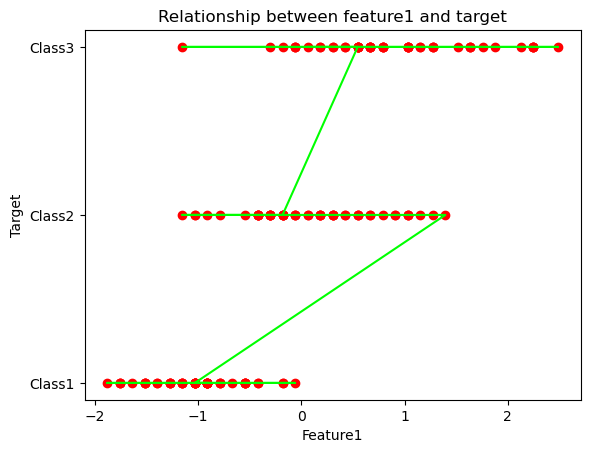

In [13]:
#Visualize the data distribution and relationships between features using plots. 
plt.scatter(scaled_data['feature1'], scaled_data['target'], color='red')  
plt.plot(scaled_data['feature1'], scaled_data['target'], color='lime')
plt.title('Relationship between feature1 and target')
plt.xlabel('Feature1')
plt.ylabel('Target')
plt.show()

In [14]:
#o Apply Logistic Regression, Decision Tree, and Random Forest classifiers.
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print(f"\n{name} Confusion Matrix:\n", cm)
    print(f"{name} Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"{name} Precision: {precision_score(y_test, y_pred, average='weighted')}")
    print(f"{name} Recall: {recall_score(y_test, y_pred, average='weighted')}")
    print(f"{name} F1 Score: {f1_score(y_test, y_pred, average='weighted')}")


Logistic Regression Confusion Matrix:
 [[10  0  0]
 [ 0  6  3]
 [ 0  0 11]]
Logistic Regression Accuracy: 0.9
Logistic Regression Precision: 0.9214285714285714
Logistic Regression Recall: 0.9
Logistic Regression F1 Score: 0.896

Decision Tree Confusion Matrix:
 [[10  0  0]
 [ 0  6  3]
 [ 0  0 11]]
Decision Tree Accuracy: 0.9
Decision Tree Precision: 0.9214285714285714
Decision Tree Recall: 0.9
Decision Tree F1 Score: 0.896

Random Forest Confusion Matrix:
 [[10  0  0]
 [ 0  6  3]
 [ 0  0 11]]
Random Forest Accuracy: 0.9
Random Forest Precision: 0.9214285714285714
Random Forest Recall: 0.9
Random Forest F1 Score: 0.896


In [15]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
for name, clf in classifiers.items():
    cv_scores = cross_val_score(clf, X, y, cv=kf)
    print(f"\n{name} Cross-Validation Mean Score: {cv_scores.mean()}")
    print(f"{name} Cross-Validation Std Dev: {cv_scores.std()}")


Logistic Regression Cross-Validation Mean Score: 0.9533333333333334
Logistic Regression Cross-Validation Std Dev: 0.039999999999999994

Decision Tree Cross-Validation Mean Score: 0.9466666666666667
Decision Tree Cross-Validation Std Dev: 0.03399346342395189

Random Forest Cross-Validation Mean Score: 0.9533333333333334
Random Forest Cross-Validation Std Dev: 0.039999999999999994


In [19]:
regressors = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor()
}

In [21]:
#o Apply Logistic Regression, Decision Tree, and Random Forest classifiers.
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print(f"\n{name} Confusion Matrix:\n", cm)
    print(f"{name} Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"{name} Precision: {precision_score(y_test, y_pred, average='weighted')}")
    print(f"{name} Recall: {recall_score(y_test, y_pred, average='weighted')}")
    print(f"{name} F1 Score: {f1_score(y_test, y_pred, average='weighted')}")



Logistic Regression Confusion Matrix:
 [[10  0  0]
 [ 0  6  3]
 [ 0  0 11]]
Logistic Regression Accuracy: 0.9
Logistic Regression Precision: 0.9214285714285714
Logistic Regression Recall: 0.9
Logistic Regression F1 Score: 0.896

Decision Tree Confusion Matrix:
 [[10  0  0]
 [ 0  6  3]
 [ 0  0 11]]
Decision Tree Accuracy: 0.9
Decision Tree Precision: 0.9214285714285714
Decision Tree Recall: 0.9
Decision Tree F1 Score: 0.896

Random Forest Confusion Matrix:
 [[10  0  0]
 [ 0  6  3]
 [ 0  0 11]]
Random Forest Accuracy: 0.9
Random Forest Precision: 0.9214285714285714
Random Forest Recall: 0.9
Random Forest F1 Score: 0.896


In [29]:
#o Perform cross-validation to assess the model stability.
kf = KFold(n_splits=5, shuffle=True, random_state=42)
for name, clf in classifiers.items():
    cv_scores = cross_val_score(clf, X, y, cv=kf)
    print(f"\n{name} Cross-Validation Mean Score: {cv_scores.mean()}")
    print(f"{name} Cross-Validation Std Dev: {cv_scores.std()}")


Logistic Regression Cross-Validation Mean Score: 0.9533333333333334
Logistic Regression Cross-Validation Std Dev: 0.039999999999999994

Decision Tree Cross-Validation Mean Score: 0.9397701149425288
Decision Tree Cross-Validation Std Dev: 0.0247016816104157

Random Forest Cross-Validation Mean Score: 0.9533333333333334
Random Forest Cross-Validation Std Dev: 0.039999999999999994


In [31]:
#o Apply Linear Regression and Decision Tree Regressor.
regressors = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor()
}

In [28]:
#o Evaluate the models using R-squared and Mean Squared Error (MSE). 
y_reg = scaled_data['feature1']
X_reg = scaled_data.drop('feature1', axis=1)
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

for name, reg in regressors.items():
    reg.fit(X_reg_train, y_reg_train)
    y_reg_pred = reg.predict(X_reg_test)
    print(f"\n{name} R-squared: {r2_score(y_reg_test, y_reg_pred)}")
    print(f"{name} Mean Squared Error: {mean_squared_error(y_reg_test, y_reg_pred)}")

ValueError: could not convert string to float: 'Class1'

In [32]:
#o Apply Linear Regression and Decision Tree Regressor.
regressors = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor()
}

In [33]:
#o Evaluate the models using R-squared and Mean Squared Error (MSE). 
y_reg = scaled_data['feature1']
X_reg = scaled_data.drop('feature1', axis=1)
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

for name, reg in regressors.items():
    reg.fit(X_reg_train, y_reg_train)
    y_reg_pred = reg.predict(X_reg_test)
    print(f"\n{name} R-squared: {r2_score(y_reg_test, y_reg_pred)}")
    print(f"{name} Mean Squared Error: {mean_squared_error(y_reg_test, y_reg_pred)}")

ValueError: could not convert string to float: 'Class1'